## Problem 1 (1.5 points): 
You have an ideal polymer chain with Khun length b=0.74 nm and N=1200. Plot the probability distribution of finding the end-to-end vector of this polymer change within the sperical shell at the distance $r+dr$ (in 3D), where $r$ ranges from 0 to 100 nm

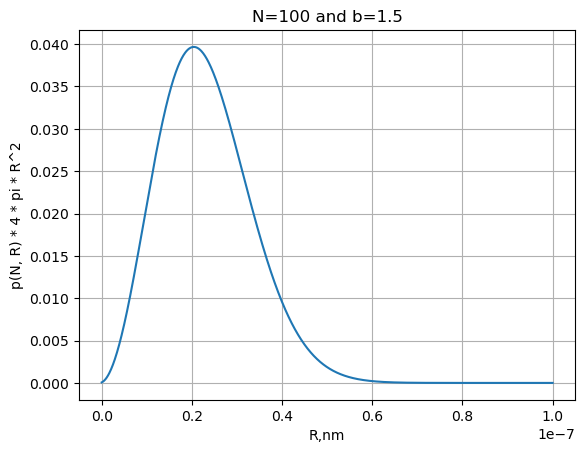

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N=1200
b=0.74e-9
dr = 1e-9
r= np.linspace(0,100e-9,1000)

def P(r):
    return (4*np.pi*r**2*(3/(2*np.pi*N*b**2))**1.5)*np.exp(-3*r**2/(2*N*b**2))*dr

prob_dist = np.array([P(i+dr/2) for i in r])
plt.plot(r, prob_dist)
plt.xlabel('R,nm')
plt.ylabel('p(N, R) * 4 * pi * R^2')
plt.title('N=100 and b=1.5')
plt.grid()
plt.show()

## Problem 2 (4 points): 

(a) Plot spinodal and binodal curves in $T $, $\phi$ phase space for a mixture of hydrogenated polybutadiene (88% vinyl) and deuterated polybutadiene (78%vinil) with Na=Nb=3000. Assume that interaction parameter has a following temperature dependance: $\chi=A+B/T$, where $B=-7.74K$ and $A=0.018$. Consider the temperature interval from 165$^o$C  to 170$^o$C. 

(b) Plot spinodal and binodal curves in $T $, $\phi$ phase space for a mixture of polyisobutylene and polypropylene with Na=Nb=3000.  Assume that interaction parameter has a following temperature dependance: $\chi=A+B/T$, where $B=0.722K$ and $A=-0.00092$. Consider the temperature interval from 50$^o$C to 200$^o$C.

Note: vary volume fraction $\phi$ in both (a) and (b) from 0.05 to 0.95

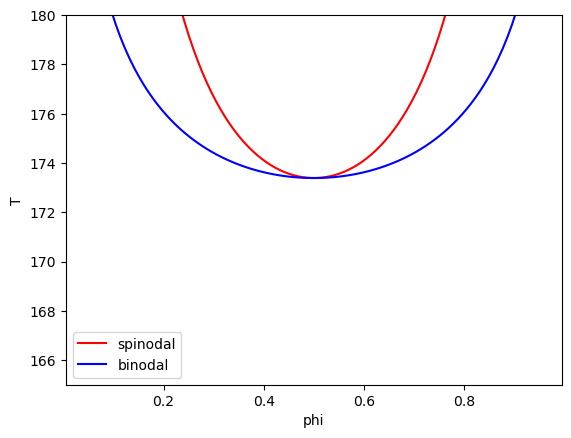

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 

Na = 3000
Nb = 3000
N = 3000
x = 0.05
A = 0.018
B = -7.74


phi_lin = np.linspace(0.05,0.95,100)

phi_s = 0.5*((1/(N*phi_lin)) + (1/(N*(1-phi_lin))))

phi_b = np.log(phi_lin/(1-phi_lin))/((2*phi_lin - 1)*Na)


T_s=B/(phi_s-A) -273.15 
T_b = B/(phi_b-A) - 273.15

plt.plot(phi_lin,T_s,'r-',label='spinodal')
plt.plot(phi_lin,T_b,'b-',label='binodal')
plt.ylim(165,180)
plt.xlabel('phi')
plt.ylabel('T')
plt.legend()
plt.show()

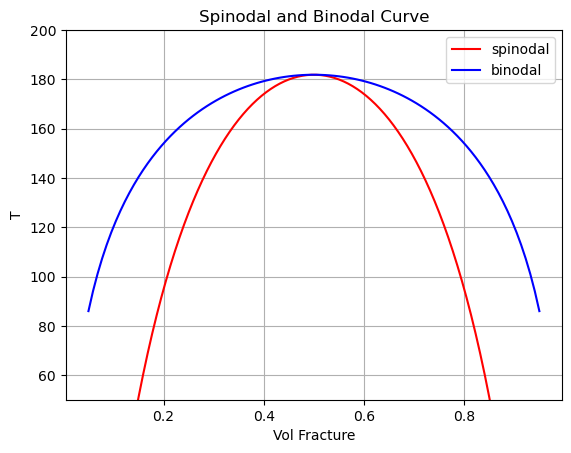

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

Na = 3000
Nb = 3000
B = 0.722
A = -0.00092

phi_lin = np.linspace(0.05,0.95,100)

phi_s = 0.5*((1/(N*phi_lin)) + (1/(N*(1-phi_lin))))

phi_b = np.log(phi_lin/(1-phi_lin))/((2*phi_lin - 1)*Na)
             
             
T_s=B/(phi_s-A) -273.15 
T_b = B/(phi_b-A) - 273.15
             
             
plt.plot(phi_lin,T_s,'r-',label='spinodal')
plt.plot(phi_lin,T_b,'b-',label='binodal')             
plt.legend()
plt.xlabel('Vol Fracture')             
plt.ylabel('T')
plt.title('Spinodal and Binodal Curve')
plt.ylim(50,200)             
plt.grid()             
plt.show() 

## Problem 3 (4 points): 

Using the data provided (stress_elongation.txt), and assuming that Neo - Hookean model captures an elastic behavior of this rubberlike material, plot the dependence of both, true and engineering stress in this material as you change elongation from 0.5 to 1.2. 

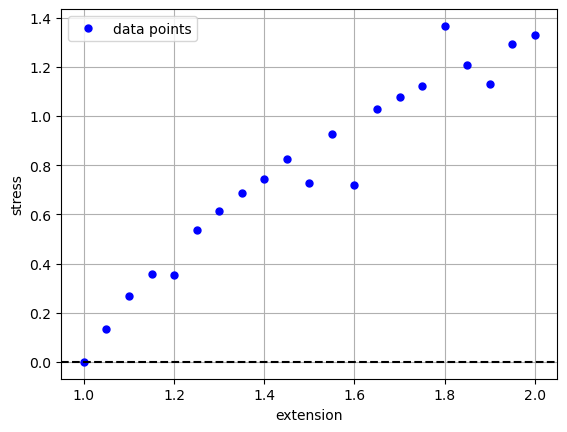

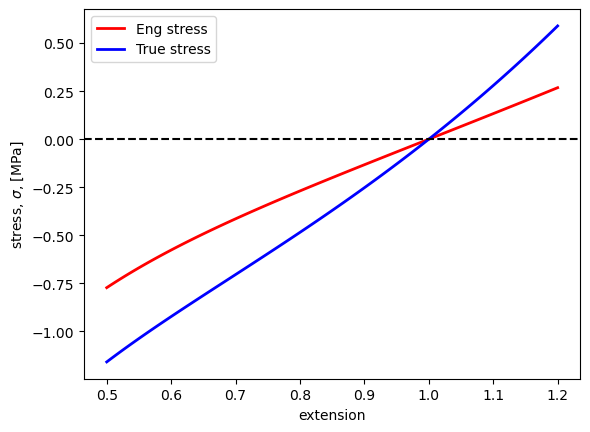

In [6]:
import numpy as np             
import scipy              
import pandas as pd             
import math             
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit             
             
df = pd.read_csv('stress_elongation_hw4.txt', usecols=[0,1], skiprows=None, header=0, sep=' ', names=['1','sigma'])

def E_stress(x, G):
    return x * G * (x - 1 / (x ** 2)) 

def t_stress(x, G):
    return E_stress(x, G) * (1 + x)
 

parameters, pcov = curve_fit(E_stress, df['1'], df['sigma'])
Gfit = parameters[0]
fitstress = E_stress(df['1'], Gfit)
truestress = t_stress(df['1'], Gfit)

plt.plot(df['1'], df['sigma'], 'ob', markersize=5, label='data points')             
plt.xlabel('extension')             
plt.ylabel('stress')             
plt.legend()             
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()             

I = np.linspace(0.5, 1.2, 100)             
plt.plot(I, E_stress(I, Gfit), '-r', linewidth=2, label='Eng stress')             
plt.plot(I, t_stress(I, Gfit), '-b', linewidth=2, label='True stress')             
plt.xlabel('extension')
plt.ylabel('stress, ' + r'$\sigma$' + ', [MPa]')
plt.legend()             
plt.axhline(y=0, color='black', linestyle='--')
plt.show()
#E_stress(x, G) * (1 + x) 

## Problem 4 (0.5 points): 
Apply an oscillatory shear to a Maxwell element and plot the loss tangent and the phase angle as a function of a reduced frequency (τw) . Vary τw within the range of from 0.001 to 1000


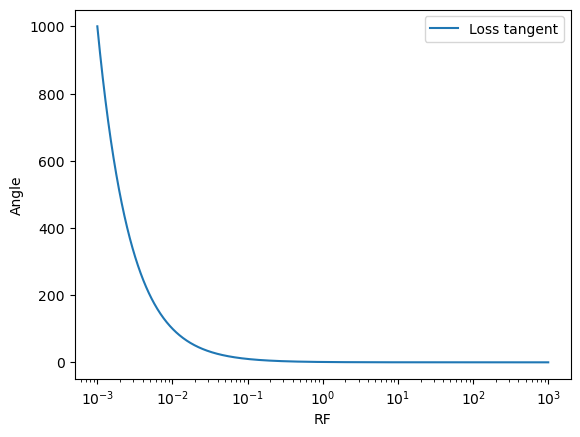

In [7]:
import numpy as np
import matplotlib.pyplot as plt

eta = 1
tau = 0.1

tau_w = np.logspace(-3,3,1000)

def tan_delta(tau_w):
    return 1/tau_w

def delta(tau_w):
    return np.arctan(1/(tau_w))


plt.plot(tau_w, tan_delta(tau_w), label='Loss tangent')
plt.legend()
plt.xlabel('RF')
plt.ylabel('Angle')
plt.xscale('log')
plt.show()


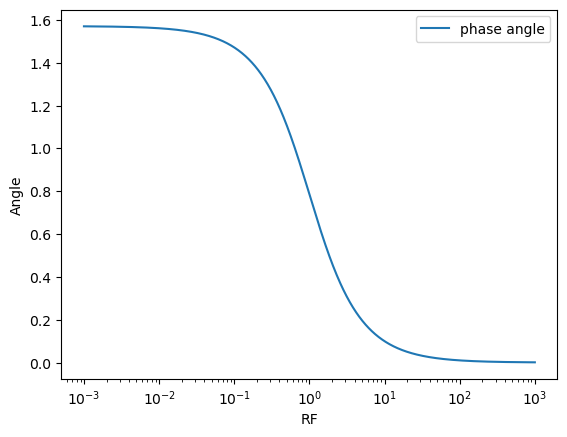

In [8]:
plt.plot(tau_w, delta(tau_w), label='phase angle')
plt.legend()
plt.xlabel('RF')
plt.ylabel('Angle')
plt.xscale('log')
plt.legend()
plt.show() 